In [1]:
#Shishir Khanal
#July 4, 2025
#AutoRegressive Model
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#Output variables depends linearly on its own previous values and on a stochastic term
#AR(1): y(t) = c + ϕ1 * y(t-1) + ϵ

In [3]:
from statsmodels.tsa.ar_model import AR, ARResults

In [4]:
df = pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


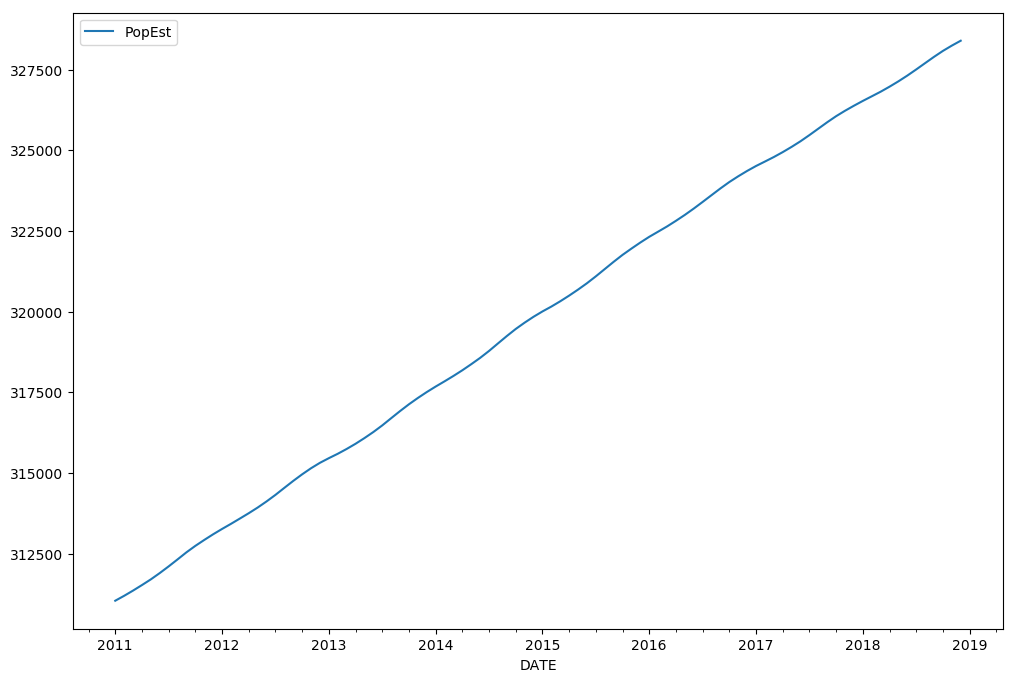

In [5]:
df.plot(figsize=(12,8))

In [6]:
train = df.iloc[:84]
test = df.iloc[84:]

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
model = AR(train['PopEst'])

In [9]:
AR1fit = model.fit(maxlag=1)

In [10]:
AR1fit.k_ar

1

In [12]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [16]:
start = len(train)
end = len(train) + len(test) - 1
display(start,end)

84

95

In [19]:
predictions1 = AR1fit.predict(start=start,end=end)

In [22]:
predictions1 = predictions1.rename('AR(1) Predictions')
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

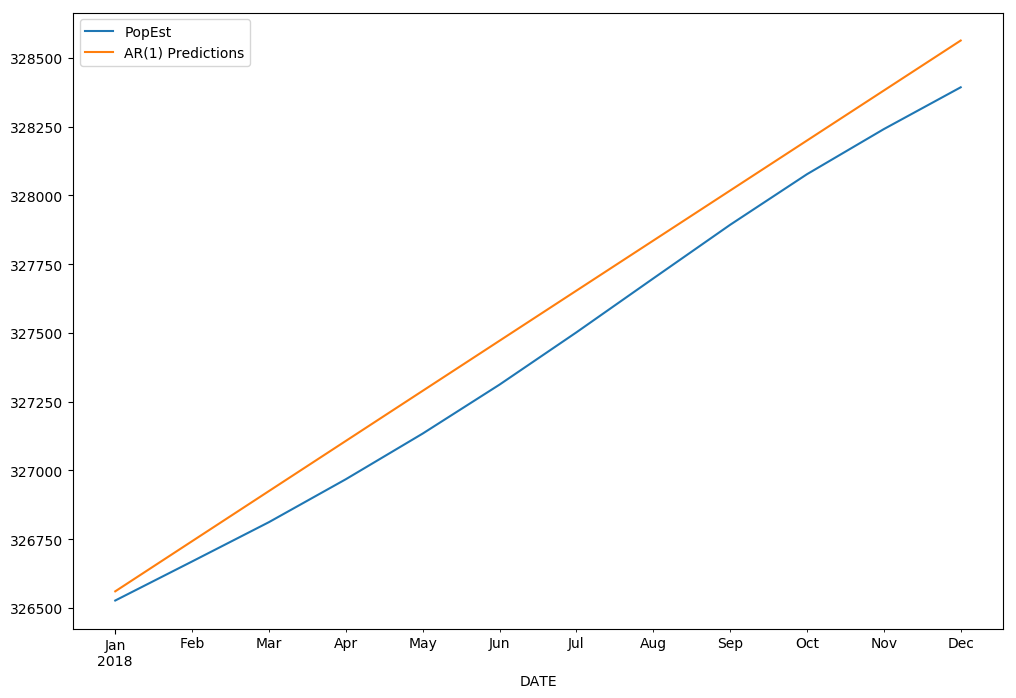

In [24]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)

In [25]:
AR2fit = model.fit(maxlag=2)
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

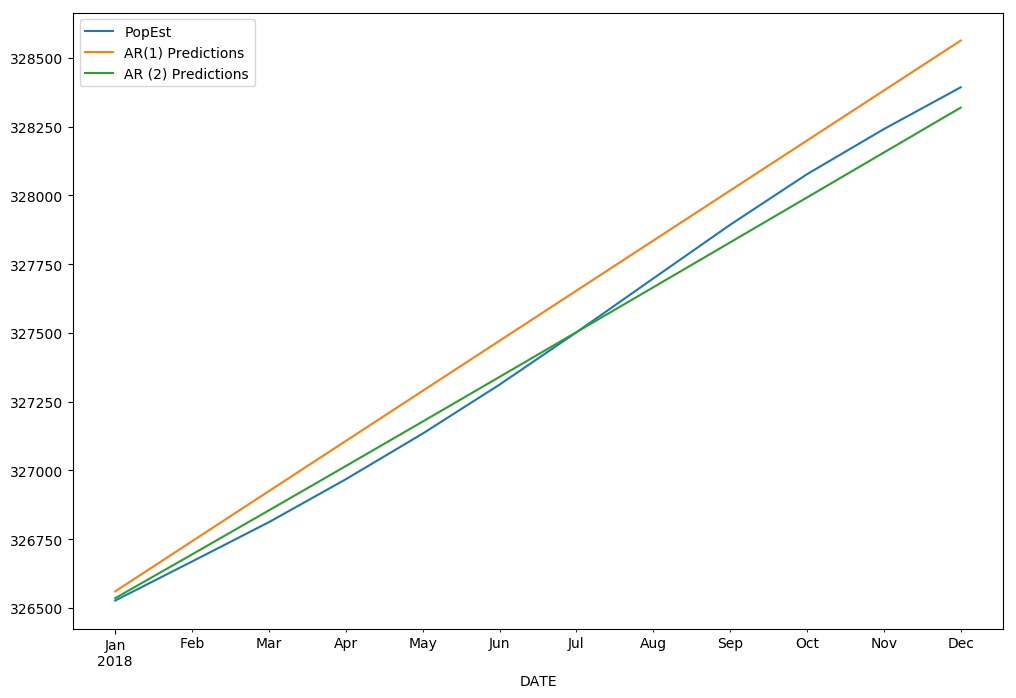

In [28]:
predictions2 = AR2fit.predict(start,end)
predictions2 = predictions2.rename('AR (2) Predictions')
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [29]:
ARfit = model.fit(ic = 't-stat')

In [30]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [34]:
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [35]:
from sklearn.metrics import mean_squared_error
labels = ['AR1','AR2','AR8']
preds = [predictions1, predictions2, predictions8]

In [36]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was:{error}')

AR1 MSE was:17449.714240543028
AR2 MSE was:2713.2586479327815
AR8 MSE was:186.9741517770251


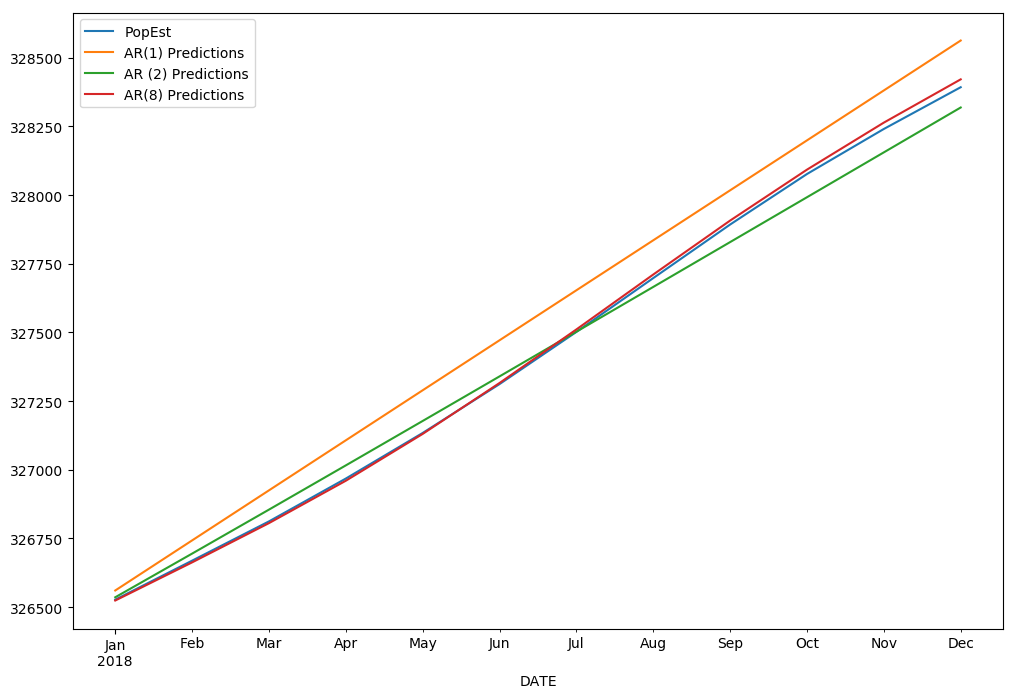

In [37]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

In [39]:
#Forecasting
model = AR(df['PopEst'])
ARfit = model.fit()
#Testset length should be matching forecast length inorder to fairly evaluate the forecast model
forecasted_values = ARfit.predict(start=len(df),end=len(df)+12).rename('Forecast')

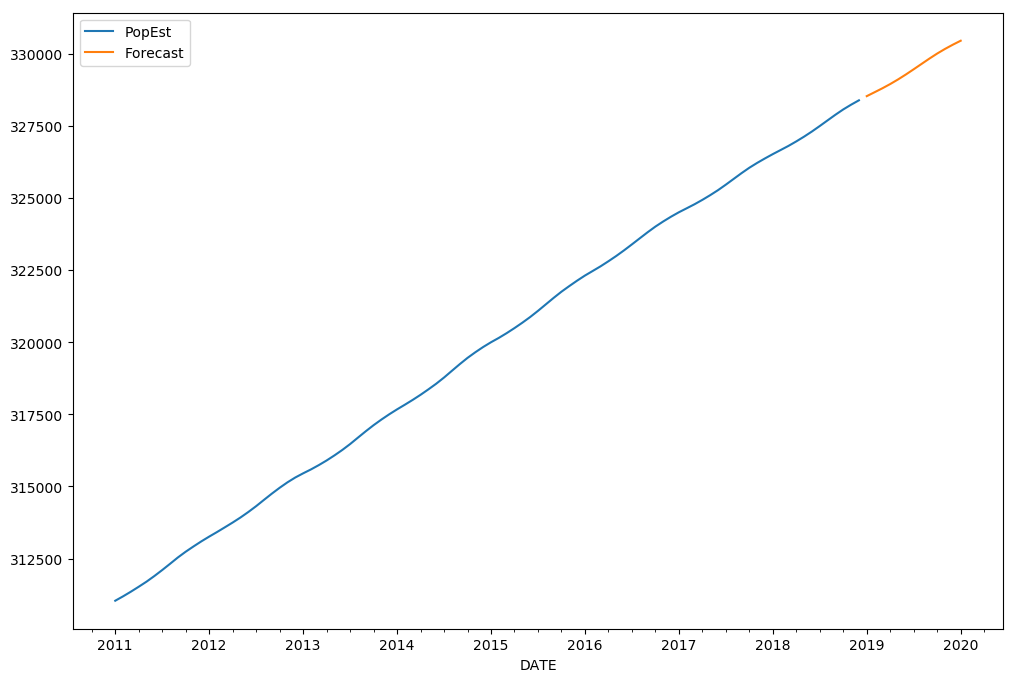

In [41]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=True)